In [95]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from textstat.textstat import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from google.colab import drive

In [ ]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00


In [96]:
from google.colab import files
data_to_load = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(data_to_load['oromiffa.csv']))

Saving oromiffa.csv to oromiffa.csv


In [97]:
dataset

,labels,posts,Unnamed: 2,Unnamed: 3
0,Free,Filannoo bara 2normal12 kanaaf paartileen Siya...,NaN,NaN
1,Free,Mana hidhaa kana keessatti akki nuti itti qab...,NaN,NaN
2,Free,Kanneen dhimma Itoophiyaa dhiheenyaan hordofa...,NaN,NaN
3,Free,Dhugaa keetii obbo baqqalaa,NaN,NaN
4,Hate,Kantiibaa Magaalaa Finfinnee Aadde Adaabech Ab...,NaN,NaN
...,...,...,...,...
19995,Hate,Rabbumti coronaaf saa godhu siin .,NaN,NaN
19996,Free,Yeroo kana gulukoosin dhiiga keessa jiru ni d...,NaN,NaN
19997,Free,nisaanii keessatti hin kufinaafii,NaN,NaN
19998,Hate,Biyya keenya miti kan nafxanyaati itiyoophiyaa...,NaN,NaN


In [ ]:
dataset = pd.read_csv("HateSpeechData.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [98]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['posts'].apply(len)
print(dataset.head())


  labels                                              posts Unnamed: 2  \
0   Free  Filannoo bara 2normal12 kanaaf paartileen Siya...        NaN   
1   Free   Mana hidhaa kana keessatti akki nuti itti qab...        NaN   
2   Free   Kanneen dhimma Itoophiyaa dhiheenyaan hordofa...        NaN   
3   Free                        Dhugaa keetii obbo baqqalaa        NaN   
4   Hate  Kantiibaa Magaalaa Finfinnee Aadde Adaabech Ab...        NaN   

  Unnamed: 3  text length  
0        NaN          144  
1        NaN          137  
2        NaN          124  
3        NaN           27  
4        NaN          329  


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

KeyError: ignored

<AxesSubplot:xlabel='class', ylabel='text length'>

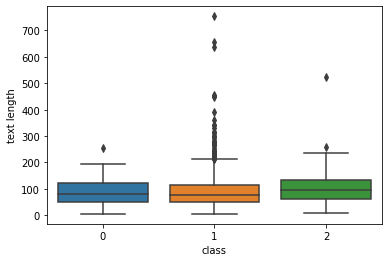

In [ ]:
sns.boxplot(x='class', y='text length', data=dataset)

<AxesSubplot:>

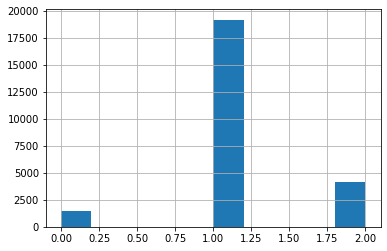

In [ ]:
dataset['class'].hist()

In [100]:
# collecting only the tweets from the csv file into a variable name tweet
posts=dataset.posts

In [101]:
import nltk

In [102]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataset["labels"] = dataset["class"]. map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
dataset = dataset[["tweet", "labels"]]
print(dataset. head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [103]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
pip install stopwrds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement stopwrds (from versions: none)
ERROR: No matching distribution found for stopwrds


In [105]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(posts):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = posts.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = posts.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

cleaned_dataset = preprocess(posts)   

dataset['cleaned_dataset'] = cleaned_dataset
print(dataset[["posts","cleaned_dataset"]])

                                                   posts  \
0      Filannoo bara 2normal12 kanaaf paartileen Siya...   
1       Mana hidhaa kana keessatti akki nuti itti qab...   
2       Kanneen dhimma Itoophiyaa dhiheenyaan hordofa...   
3                            Dhugaa keetii obbo baqqalaa   
4      Kantiibaa Magaalaa Finfinnee Aadde Adaabech Ab...   
...                                                  ...   
19995                 Rabbumti coronaaf saa godhu siin .   
19996   Yeroo kana gulukoosin dhiiga keessa jiru ni d...   
19997                  nisaanii keessatti hin kufinaafii   
19998  Biyya keenya miti kan nafxanyaati itiyoophiyaa...   
19999   1 bittaan raawwatamuun imalchiisamaa jiraachu...   

                                         cleaned_dataset  
0      filannoo bara normal kanaaf paartileen siyaasa...  
1      mana hidhaa kana keessatti akki nuti itti qabs...  
2      kanneen dhimma itoophiyaa dhiheenyaan hordofan...  
3                            dhugaa keetii 

# **Most Reapetdly used speeches**

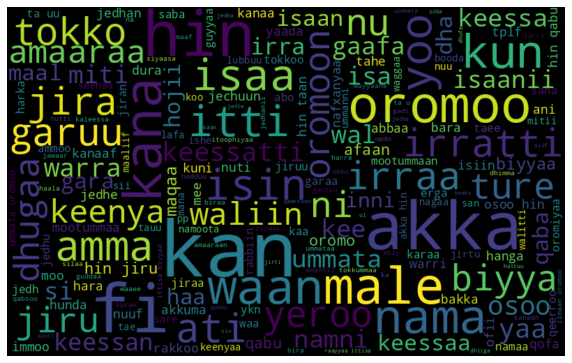

<Figure size 432x288 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt
# visualizing which of the word is most commonly used in the dataset
from wordcloud import WordCloud
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in dataset['cleaned_dataset'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig('oromo_most_occoring_words.png')

# New Section

In [108]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [109]:
# tokenization
tokenized_text = []

# loop through each row in the dataframe and tokenize the text
for index, row in dataset.iterrows():
    text = row['cleaned_dataset'] # assuming the tweet column is named 'tweet'
    words = nltk.word_tokenize(text) # tokenize the text into words
    tokenized_text.append(words) # add the tokenized words to the list

# add the tokenized word as a new column in the dataframe
dataset['tokenized_text'] = tokenized_text
# save the updated dataframe to a new csv file
dataset.to_csv('tokenized_dataset.csv', index=False)
df = pd.read_csv('tokenized_dataset.csv')
# Print the tokenized dataset
for index, row in df.iterrows():
    print(f"Text: {row['cleaned_dataset']}")
   

Streaming output truncated to the last 5000 lines.
Text: jimmaa biyyaa gaari dhaa garuu namooni tokko tokko gowaa jiraa dhugaa rabbii
Text: nama birrati moo tay matu kana bareesa yoo tay tate oromoon homa hin baleesin isintu maqaa nuf baas
Text: shimal deggar hin beeku garuu waan fedh yoo tahe dhibba ormatin kauun isaa fuldirri keenya maal akka tahe namatti agarsisa
Text: boordichi filannoo biyyaalessaa filannoo marsaa ffaa barana gaggeeffamuuf yeroon galme kaadhimamtootaa gurraandhala normal akka ta u gabate yeroo kaa us sababoota garaagaraan hanga gurraandhala normal akka dheeratu taasiisuun ni yaadatama
Text: hawwii namoota muraasaa ta ee hafa male oromoon amaaraa waliin hin jiraatu kanaan booda
Text: barnootni gargaarsa duraa first aid jedhamu guyyaa booru irraa eegale miidiyaale fi karaa garaagaraan ummataaf kan laatamu ta u beeksisanii jiru
Text: tibba mootummaan murte akkasii dabarsu gidduu dhabate gorsuun dogoggora mudachuu malu hambisuu qaba
Text: seerri idil adunyaa haqaqabee

In [110]:
x = np.array(dataset["posts"])
y = np.array(dataset["labels"])
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)# Fit the Data
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



In [111]:
print("Training set size:", X_train)

Training set size:   (0, 4103)	1
  (0, 43848)	1
  (0, 25364)	1
  (0, 50692)	1
  (0, 14064)	1
  (0, 50653)	1
  (0, 44851)	1
  (0, 7507)	1
  (0, 7110)	1
  (0, 3950)	1
  (0, 8132)	1
  (1, 7295)	1
  (1, 294)	1
  (1, 61338)	1
  (1, 58911)	1
  (1, 36851)	1
  (1, 19958)	1
  (1, 7534)	1
  (1, 5010)	1
  (1, 61809)	1
  (1, 51276)	1
  (1, 46859)	1
  (1, 51278)	1
  (1, 40466)	1
  (2, 40446)	1
  :	:
  (11997, 63826)	1
  (11997, 36282)	1
  (11997, 10674)	1
  (11997, 39537)	1
  (11997, 28572)	1
  (11997, 65742)	1
  (11998, 50994)	1
  (11998, 5553)	1
  (11998, 35020)	1
  (11998, 6785)	1
  (11998, 19846)	1
  (11998, 43971)	1
  (11999, 50770)	1
  (11999, 16863)	1
  (11999, 46417)	1
  (11999, 66246)	1
  (11999, 33009)	1
  (11999, 65411)	1
  (11999, 42359)	1
  (11999, 61073)	1
  (11999, 25772)	1
  (11999, 22758)	1
  (11999, 62754)	1
  (11999, 43837)	1
  (11999, 1189)	1


In [112]:
print("Testing set size:",X_test)

Testing set size:   (0, 64168)	1
  (0, 24488)	1
  (0, 37126)	1
  (0, 4198)	1
  (0, 7233)	1
  (0, 43665)	1
  (0, 43692)	1
  (1, 40736)	1
  (1, 31239)	1
  (1, 1078)	1
  (1, 44503)	1
  (1, 46440)	1
  (1, 58197)	1
  (1, 64025)	1
  (1, 3290)	1
  (1, 19214)	1
  (1, 11488)	1
  (1, 57217)	1
  (2, 34658)	1
  (2, 3089)	1
  (2, 35073)	1
  (2, 31239)	1
  (2, 40599)	1
  (2, 50756)	1
  (2, 44503)	1
  :	:
  (3997, 45774)	1
  (3997, 6097)	1
  (3997, 684)	1
  (3997, 21029)	1
  (3997, 55237)	1
  (3998, 31239)	1
  (3998, 24403)	1
  (3998, 9849)	1
  (3998, 52489)	1
  (3998, 1340)	1
  (3998, 10825)	1
  (3998, 26744)	1
  (3998, 47556)	1
  (3998, 46499)	1
  (3998, 59576)	1
  (3998, 13803)	2
  (3998, 10770)	1
  (3999, 4147)	1
  (3999, 22391)	2
  (3999, 37445)	1
  (3999, 56956)	1
  (3999, 61073)	1
  (3999, 37444)	1
  (3999, 34793)	1
  (3999, 3588)	1


In [113]:
print("Training set size:", X_val)

Training set size:   (0, 31239)	2
  (0, 38565)	1
  (0, 23798)	1
  (0, 50756)	1
  (0, 46417)	1
  (0, 43243)	1
  (0, 48304)	1
  (0, 59343)	1
  (0, 9494)	1
  (0, 63152)	1
  (0, 56267)	1
  (0, 48305)	1
  (0, 34115)	1
  (0, 62858)	1
  (0, 18239)	1
  (0, 2694)	1
  (0, 26584)	1
  (0, 9086)	1
  (0, 48375)	1
  (0, 54362)	1
  (0, 22847)	1
  (0, 27542)	1
  (0, 26001)	1
  (0, 9088)	1
  (0, 4101)	1
  :	:
  (3998, 60768)	1
  (3998, 29770)	1
  (3998, 24033)	1
  (3998, 2119)	1
  (3998, 33093)	1
  (3998, 63699)	1
  (3998, 63636)	1
  (3998, 56952)	1
  (3998, 34464)	1
  (3998, 29560)	1
  (3999, 39835)	1
  (3999, 36928)	1
  (3999, 22391)	1
  (3999, 60666)	1
  (3999, 30241)	1
  (3999, 18198)	1
  (3999, 46781)	1
  (3999, 42359)	1
  (3999, 64211)	1
  (3999, 50690)	1
  (3999, 48420)	1
  (3999, 43920)	1
  (3999, 18785)	1
  (3999, 57231)	1
  (3999, 10599)	1


In [114]:
X_train

<12000x66581 sparse matrix of type '<class 'numpy.int64'>'
	with 237827 stored elements in Compressed Sparse Row format>

In [115]:
y_train

array(['Hate', 'Free', 'Free', ..., 'Hate', 'Hate', 'Hate'], dtype=object)

In [116]:
X_test

<4000x66581 sparse matrix of type '<class 'numpy.int64'>'
	with 80229 stored elements in Compressed Sparse Row format>

In [118]:
y_test

array(['Hate', 'Hate', 'Free', ..., 'Free', 'Free', 'Hate'], dtype=object)

In [119]:
from sklearn.metrics import classification_report
#model.score(X_test,y_test)
# Define hyperparameters
max_depths = [67,2,5,9,4,6,100,1000] # maximum depth of the tree ,0
min_samples_splits = [1001,89,90,34,45,65,254] # minimum number of samples required to split an internal node 2
min_samples_leaves = [890,2001,2400,67,544,560,679,2] # minimum number of samples required to be at a leaf node 
# Train the model with different hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            # Define the model
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,criterion='gini')
            # Train the model
            model.fit(X_train, y_train)
           #train and test
            score = model.score(X_test, y_test)
           
            # Print the results
            print(f"Max depth: {max_depth}, Min samples split: {min_samples_split}, Min samples leaf: {min_samples_leaf}, Accuracy score: {score}")


Max depth: 67, Min samples split: 1001, Min samples leaf: 890, Accuracy score: 0.621
Max depth: 67, Min samples split: 1001, Min samples leaf: 2001, Accuracy score: 0.55875
Max depth: 67, Min samples split: 1001, Min samples leaf: 2400, Accuracy score: 0.55625
Max depth: 67, Min samples split: 1001, Min samples leaf: 67, Accuracy score: 0.708
Max depth: 67, Min samples split: 1001, Min samples leaf: 544, Accuracy score: 0.64525
Max depth: 67, Min samples split: 1001, Min samples leaf: 560, Accuracy score: 0.64525
Max depth: 67, Min samples split: 1001, Min samples leaf: 679, Accuracy score: 0.64525
Max depth: 67, Min samples split: 1001, Min samples leaf: 2, Accuracy score: 0.73875
Max depth: 67, Min samples split: 89, Min samples leaf: 890, Accuracy score: 0.621
Max depth: 67, Min samples split: 89, Min samples leaf: 2001, Accuracy score: 0.55875
Max depth: 67, Min samples split: 89, Min samples leaf: 2400, Accuracy score: 0.55625
Max depth: 67, Min samples split: 89, Min samples leaf

Evaluation of Mode


In [ ]:
            # Test the model on the testing set
            y_pred = model.predict(X_test)
            # Evaluate the model's performance
            report = classification_report(y_test, y_pred)
            print(report)

                              precision    recall  f1-score   support

                 Hate Speech       0.32      0.16      0.21       290
No Hate and Offensive Speech       0.83      0.91      0.87       835
            Offensive Speech       0.93      0.95      0.94      3832

                    accuracy                           0.90      4957
                   macro avg       0.69      0.67      0.67      4957
                weighted avg       0.88      0.90      0.88      4957



In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1000,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 254,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Predicting the outcome ***

In [122]:
#Predicting the outcome
inp =input("Enter post :                 ")
dp = cv.transform([inp]).toarray()
dt=model.predict(dp)
if dt=='Hate':
    print("//////////////////////////////")
    print("/////the post is blocked//////")
    print("//////////////////////////////")

else:
    print(inp)
   
print(dt)

Enter post :                 abiy ahmad
//////////////////////////////
/////the post is blocked//////
//////////////////////////////
['Hate']
